# **Samsung Stock Data Analysis (2007-2024)**

## **Overview**
This notebook analyzes Samsung stock data from 2007 to 2024 using pandas, Matplotlib, and Seaborn. The analysis aims to uncover trends, measure volatility, explore correlations, and gain insights into the stock's behavior over time.

---

## **Key Questions Addressed**

### **1. What is the trend of Samsung's stock price from 2007 to 2024?**
- Examined the long-term trend of the adjusted close price to understand the stock's overall performance over 17 years.

### **2. What are the highest and lowest adjusted close prices, and when did they occur?**
- Identified the maximum and minimum adjusted close prices and their corresponding dates.

### **3. How volatile is Samsung's stock on a daily basis?**
- Calculated daily returns to measure day-to-day price fluctuations and visualize volatility over time.

### **4. During which periods did Samsung stock experience the highest volatility?**
- Highlighted periods of extreme volatility using a threshold for daily returns and marked them on a stock price chart.

### **5. How does the stock price correlate with trading volume?**
- Analyzed the relationship between the adjusted close price and trading volume using scatter plots.

### **6. How has trading volume changed over the years?**
- Visualized the trend of trading volume over time to understand changes in market activity.

### **7. What is the distribution of Samsung's adjusted close price?**
- Explored the distribution of adjusted close prices to identify patterns, outliers, and the overall spread of stock prices.

### **8. How does Samsung's stock price behave in specific years of interest?**
- Focused on specific years (e.g., 2020) to analyze the stock's behavior during significant global or company-related events.

---

## **Conclusion**
This analysis provides valuable insights into Samsung's stock performance over the years, focusing on trends, volatility, trading behavior, and key historical moments. It serves as a comprehensive resource for understanding long-term stock performance and market dynamics.

---

## **Tools and Libraries Used**
- **pandas**: For data manipulation, cleaning, and time-series analysis.
- **Matplotlib**: For visualizing stock trends and volatility over time.
- **Seaborn**: For creating st


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/samsung-stock-data-2024/samsung_stock.csv')
df.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900
3,2007-01-05,8658.477539,11900.0,12180.0,11900.0,12160.0,28400400
4,2007-01-08,8498.408203,11680.0,11880.0,11580.0,11840.0,33081550


In [2]:
print(df.isnull().sum())

Unnamed: 0    0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64


In [3]:
df.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,2007-01-02,9109.592773,12520.0,12540.0,12320.0,12400.0,17607300
1,2007-01-03,8934.966797,12280.0,12560.0,12220.0,12540.0,19676500
2,2007-01-04,8818.548828,12120.0,12240.0,12060.0,12220.0,18258900
3,2007-01-05,8658.477539,11900.0,12180.0,11900.0,12160.0,28400400
4,2007-01-08,8498.408203,11680.0,11880.0,11580.0,11840.0,33081550


In [4]:
# Rename the 'Unnamed: 0' column to 'date'
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Check the first few rows
print(df.head())


              Adj Close    Close     High      Low     Open    Volume
date                                                                 
2007-01-02  9109.592773  12520.0  12540.0  12320.0  12400.0  17607300
2007-01-03  8934.966797  12280.0  12560.0  12220.0  12540.0  19676500
2007-01-04  8818.548828  12120.0  12240.0  12060.0  12220.0  18258900
2007-01-05  8658.477539  11900.0  12180.0  11900.0  12160.0  28400400
2007-01-08  8498.408203  11680.0  11880.0  11580.0  11840.0  33081550


## What is the trend of Samsung's stock price from 2007 to 2024?

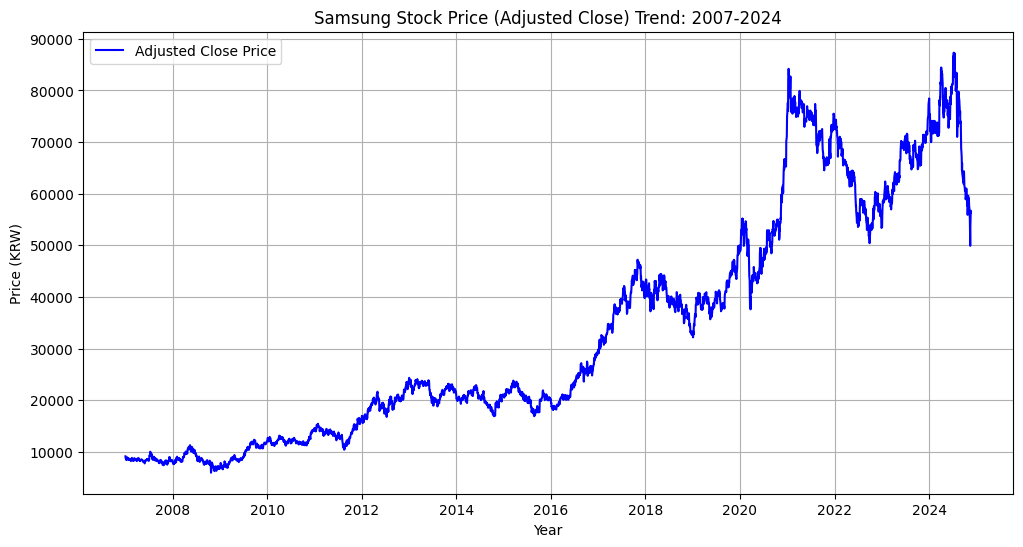

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Samsung Stock Price (Adjusted Close) Trend: 2007-2024')
plt.xlabel('Year')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()

## What are the highest and lowest adjusted close prices, and when did they occur?

In [6]:
# Find the highest and lowest adjusted close prices
highest_price = df['Adj Close'].max()
lowest_price = df['Adj Close'].min()

# Get the corresponding dates
highest_date = df[df['Adj Close'] == highest_price].index[0]
lowest_date = df[df['Adj Close'] == lowest_price].index[0]

print(f"Highest Adjusted Close Price: {highest_price:.2f} on {highest_date.date()}")
print(f"Lowest Adjusted Close Price: {lowest_price:.2f} on {lowest_date.date()}")


Highest Adjusted Close Price: 87310.11 on 2024-07-09
Lowest Adjusted Close Price: 5936.67 on 2008-10-24


## How volatile is Samsung's stock on a daily basis?

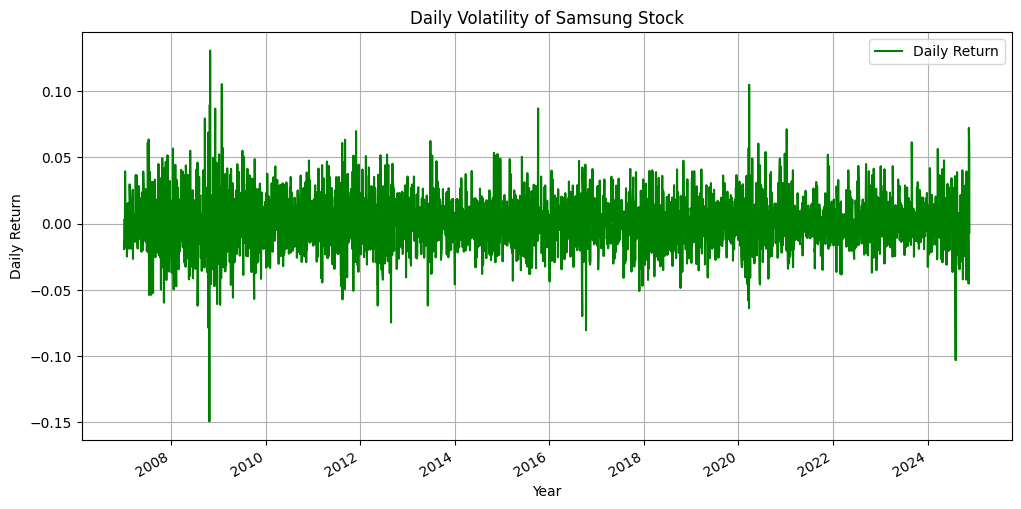

In [7]:
# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Plot the daily returns
plt.figure(figsize=(12, 6))
df['Daily Return'].plot(color='green', label='Daily Return')
plt.title('Daily Volatility of Samsung Stock')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


## During which periods did Samsung stock experience the highest volatility?

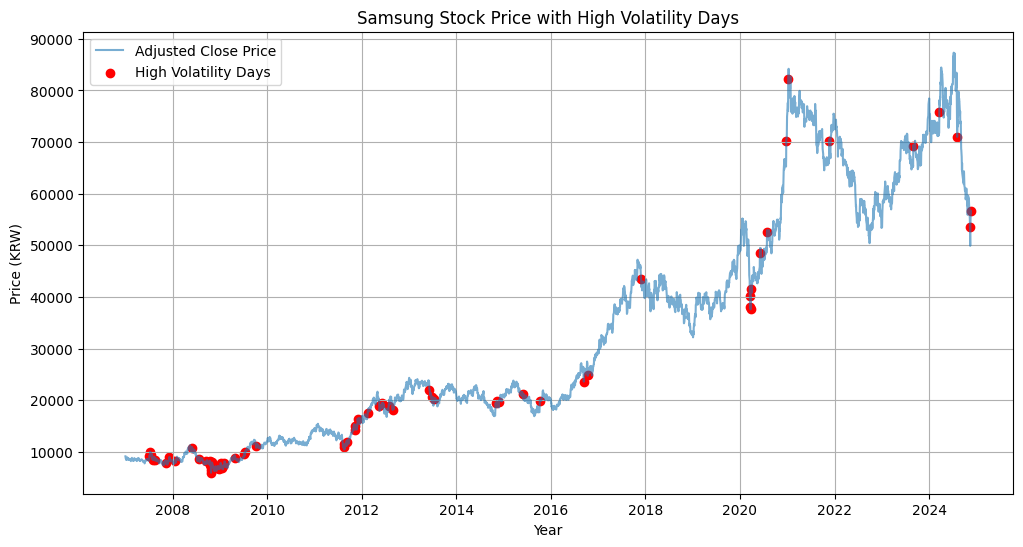

In [8]:
# Define high volatility threshold (e.g., daily returns > 5% or < -5%)
high_volatility = df[df['Daily Return'].abs() > 0.05]

# Plot high volatility days
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Adjusted Close Price', alpha=0.6)
plt.scatter(high_volatility.index, high_volatility['Adj Close'], color='red', label='High Volatility Days')
plt.title('Samsung Stock Price with High Volatility Days')
plt.xlabel('Year')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()


## How does the stock price correlate with trading volume?

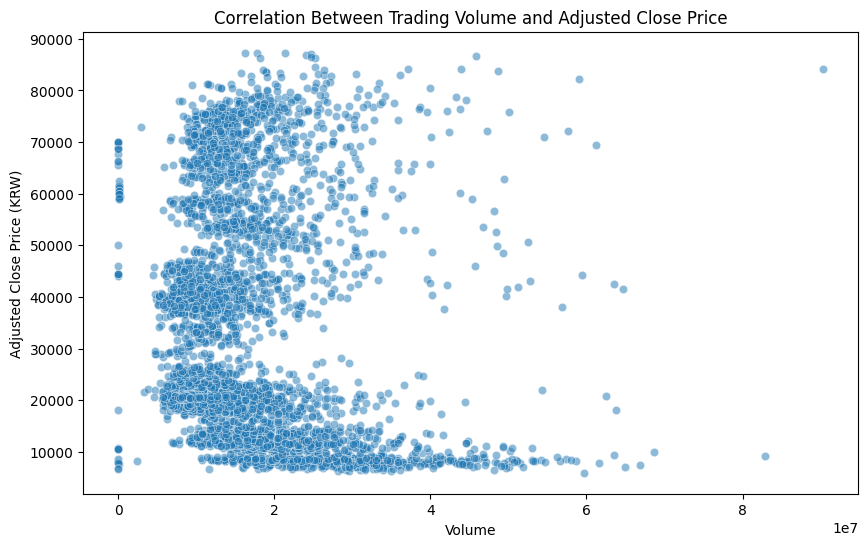

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Adj Close', data=df, alpha=0.5)
plt.title('Correlation Between Trading Volume and Adjusted Close Price')
plt.xlabel('Volume')
plt.ylabel('Adjusted Close Price (KRW)')
plt.show()


## How has trading volume changed over the years?

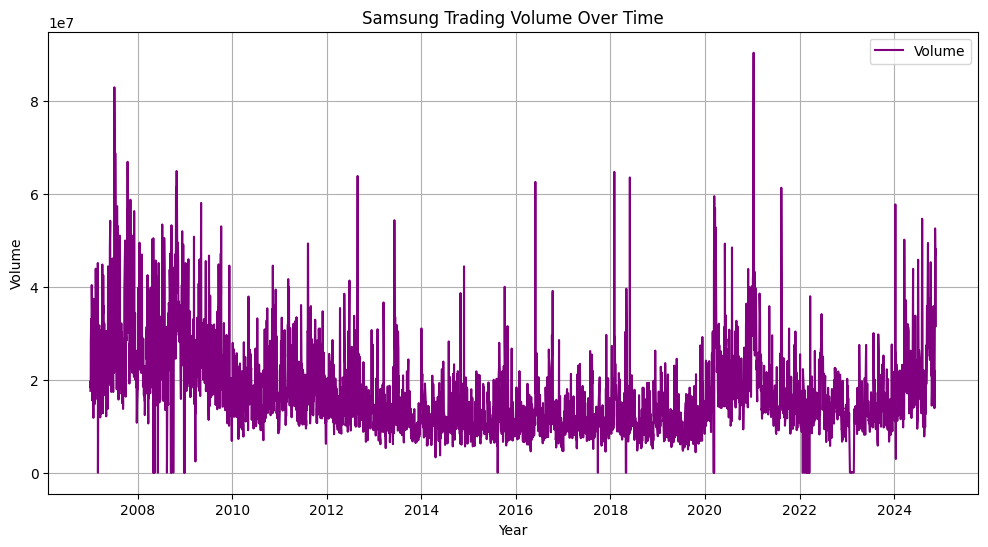

In [10]:
# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], color='purple', label='Volume')
plt.title('Samsung Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


## What is the distribution of Samsung's adjusted close price?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


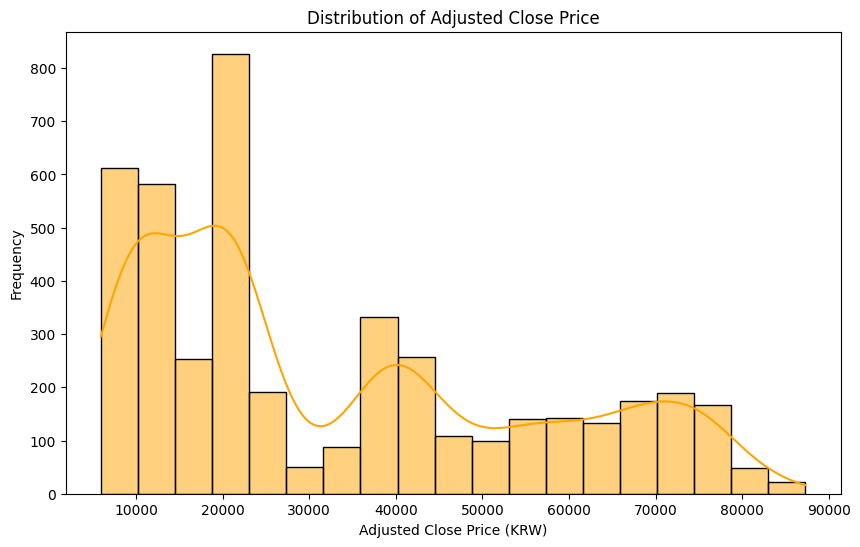

In [11]:
# Plot the distribution of adjusted close price
plt.figure(figsize=(10, 6))
sns.histplot(df['Adj Close'], kde=True, color='orange')
plt.title('Distribution of Adjusted Close Price')
plt.xlabel('Adjusted Close Price (KRW)')
plt.ylabel('Frequency')
plt.show()


## How does Samsung's stock price behave in specific years of interest?

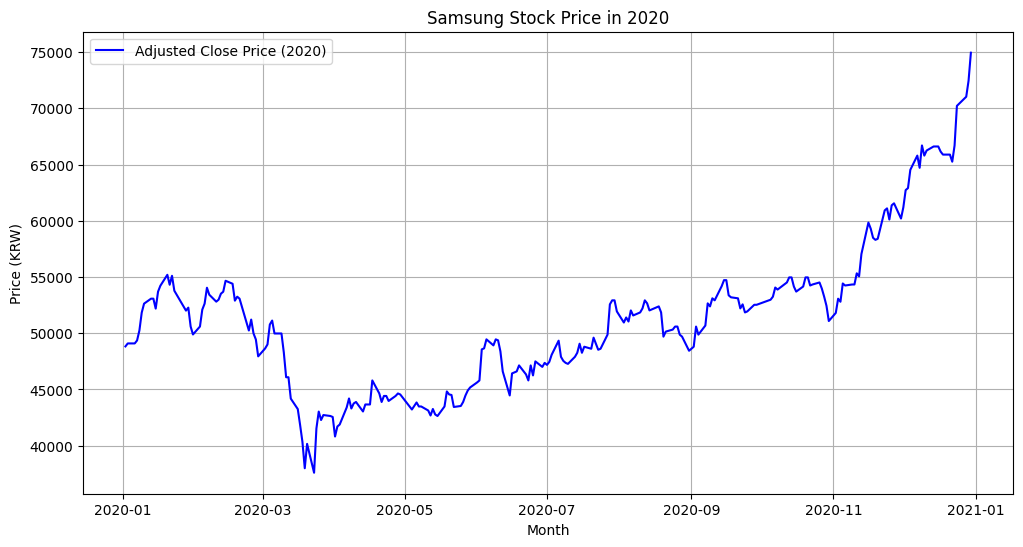

In [12]:
# Slice the data for 2020
year_2020 = df['2020-01-01':'2020-12-31']

# Plot the adjusted close price for 2020
plt.figure(figsize=(12, 6))
plt.plot(year_2020['Adj Close'], label='Adjusted Close Price (2020)', color='blue')
plt.title('Samsung Stock Price in 2020')
plt.xlabel('Month')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()


## What are the monthly average prices over the years?

/tmp/ipykernel_17/115813776.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Adj Close'].resample('M').mean()


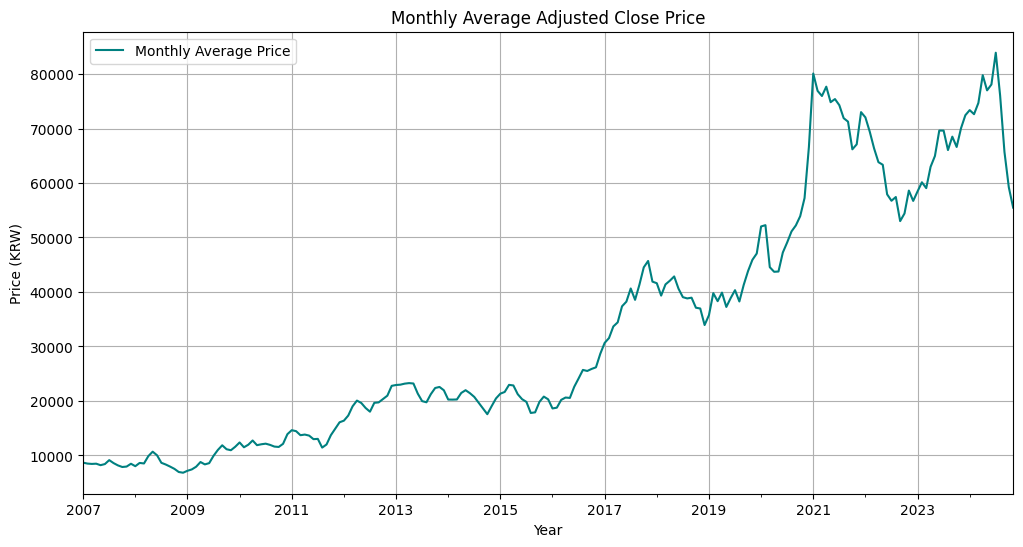

In [13]:
# Resample data to monthly frequency and calculate the mean
monthly_avg = df['Adj Close'].resample('M').mean()

# Plot monthly average prices
plt.figure(figsize=(12, 6))
monthly_avg.plot(color='teal', label='Monthly Average Price')
plt.title('Monthly Average Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()
